In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
np.shape(x_train[0])

(28, 28)

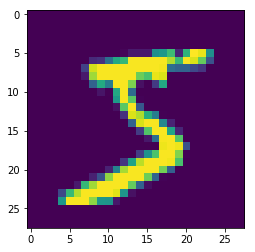

In [8]:
plt.imshow(x_train[0])

In [9]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

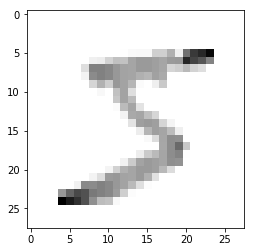

In [11]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = np.shape(x_train[0])))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 8s 132us/step - loss: 0.2636 - acc: 0.9224
Epoch 2/3
60000/60000 [==============================] - 8s 127us/step - loss: 0.1077 - acc: 0.9670
Epoch 3/3
60000/60000 [==============================] - 8s 133us/step - loss: 0.0738 - acc: 0.9770


In [19]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 63us/step
0.10236814469173551 0.969


In [21]:
model.save('./Models/mnist.model')